In [15]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
from utils import *
logging.getLogger('matplotlib.font_manager').disabled = True

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.rcParams['figure.figsize'] = (18, 8)
default_color_cycle = mpl.rcParams['axes.prop_cycle'] # save this as we will want it back later
from cycler import cycler
plt.style.use('seaborn')
sns.set(context = 'notebook', style = 'white', font_scale = 1.5)

2022-01-31 12:03:37,611 Loaded backend module://ipykernel.pylab.backend_inline version unknown.


# Data

In [2]:
etfs = [
    'VTI', 'EFA', 'EEM', 'TLT', 'TIP', 'VNQ',
#     'IEF', 'GLD', 'DBC',
]
path = '/home/autarkydotai/asalas/dphil/data/'

etf_data = {
    etf: pd.read_csv(path + etf + '.csv', index_col=0, parse_dates=True)
    for etf in etfs
}

S = pd.DataFrame({
    etf: data['Adj Close'] for etf, data in etf_data.items()
})

S.dropna(inplace = True)

# create other frequencies
mS = S.resample('M').last()
wS = S.resample('W').last()
qS = S.resample('Q').last()
yS = S.resample('Y').last()

S.tail()

2022-01-31 10:35:39,615 NumExpr defaulting to 8 threads.


,VTI,EFA,EEM,TLT,TIP,VNQ
Date,,,,,,
2019-05-28,143.309998,64.150002,40.090000,128.436417,113.338203,87.190002
2019-05-29,142.330002,63.740002,40.349998,128.825607,113.537094,86.029999
2019-05-30,142.610001,63.980000,40.570000,129.933334,113.914993,86.389999
2019-05-31,140.690002,63.400002,40.709999,131.559998,114.630997,86.889999
2019-06-03,140.410004,63.770000,41.080002,132.440002,114.940002,87.099998


# Figure 6.10

In [3]:
swensen_allocation = [0.3, 0.15, 0.1, 0.15, 0.15, 0.15]
benchmark = ['SPY']

olps_algos = [
    algos.BAH(),
    BestStock(),
    algos.BCRP(),
    algos.CRP(b=swensen_allocation),
    algos.UP(),
    algos.EG(),
    algos.ONS(),
#     algos.Anticor(),
    # missing: B^K,
#     BNN(),
#     algos.CORN(),
    algos.PAMR(),
    algos.CWMR(),
    algos.OLMAR(),
    SingleOLMAX(),
    MultiOLMAX(),
    MultiOLMAX2(alpha=0.3),
#     MAPGRAD(demean=False),
    AdaPAMR(demean=False),
    AdaOLMAR(demean=False),
    AdaPAMR(demean=False, ogd_annealing=True),
    AdaOLMAR(demean=False, ogd_annealing=True),
]

algo_names = [algo.__class__.__name__ for algo in olps_algos[:-2]]
algo_names.extend([
    r'AdaPAMR with $1/\sqrt{t}$ annealing',
    r'AdaOLMAR with $1/\sqrt{t}$ annealing',
])
algo_data = [
    'algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return',
    'drawdown_period', 'winning_pct', 'vol', 'mdd']
metrics = algo_data[2:]
etf_olps = pd.DataFrame(index=algo_names, columns=algo_data)
etf_olps.algo = olps_algos

# run all algos - this takes more than a minute
for name, algo in zip(etf_olps.index, etf_olps.algo):
    etf_olps.loc[name, 'results'] = algo.run(S)

2022-01-31 10:35:39,679 Running BAH...
2022-01-31 10:35:39,687 BAH finished successfully.
2022-01-31 10:35:39,704 Running BestStock...
2022-01-31 10:35:39,714 BestStock finished successfully.
2022-01-31 10:35:39,726 Running BCRP...
2022-01-31 10:35:39,883 BCRP finished successfully.
2022-01-31 10:35:39,902 Running CRP...
2022-01-31 10:35:39,910 CRP finished successfully.
2022-01-31 10:35:39,945 Running UP...
2022-01-31 10:35:40,038 Progress: 0.0%...
2022-01-31 10:35:40,503 Progress: 10.0%...
2022-01-31 10:35:41,052 Progress: 20.0%...
2022-01-31 10:35:41,737 Progress: 30.0%...
2022-01-31 10:35:42,240 Progress: 40.0%...
2022-01-31 10:35:42,692 Progress: 50.0%...
2022-01-31 10:35:43,203 Progress: 60.0%...
2022-01-31 10:35:44,424 Progress: 70.0%...
2022-01-31 10:35:47,337 Progress: 80.0%...
2022-01-31 10:35:48,938 Progress: 90.0%...
2022-01-31 10:35:49,659 UP finished successfully.
2022-01-31 10:35:49,703 Running EG...
2022-01-31 10:35:49,736 Progress: 0.0%...
2022-01-31 10:35:50,053 Progr

In [4]:
# etf_olps.results.iteritems()

2022-01-31 12:03:43,951 Assigning font /b'F1' = '/home/autarkydotai/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2022-01-31 12:03:44,234 Assigning font /b'F2' = '/home/autarkydotai/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf'
2022-01-31 12:03:44,235 Assigning font /b'F3' = '/home/autarkydotai/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf'
2022-01-31 12:03:44,239 Embedding font /home/autarkydotai/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf.
2022-01-31 12:03:44,240 Writing TrueType font.
2022-01-31 12:03:44,249 Embedding font /home/autarkydotai/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2022-01-31 12:03:44,250 Writing TrueType font.
2022-01-31 12:03:44,266 Embedding font /home/autarkydotai/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf.
2022-01-31 12:

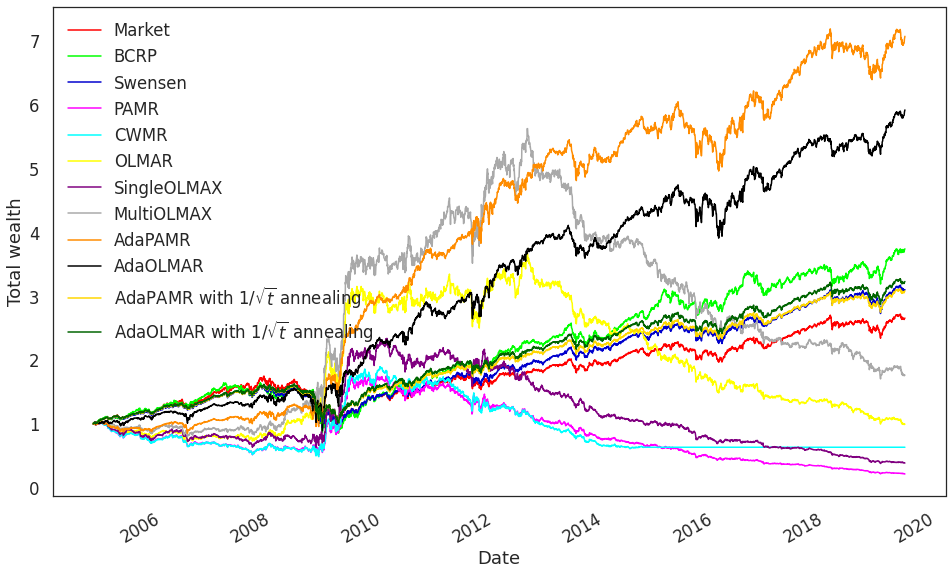

In [16]:
subalgos = [
    algos.BAH(),
    algos.BCRP(),
    algos.CRP(b=swensen_allocation),
    algos.PAMR(),
    algos.CWMR(),
    algos.OLMAR(),
    SingleOLMAX(),
    MultiOLMAX(),
#     AdaOLMAR(),
#     AdaPAMR(),
    AdaPAMR(demean=False),
    AdaOLMAR(demean=False),
]

subalgo_names = [algo.__class__.__name__ for algo in subalgos]
subalgo_names.extend([
    r'AdaPAMR with $1/\sqrt{t}$ annealing',
    r'AdaOLMAR with $1/\sqrt{t}$ annealing',
])

colors = {
    'Market': 'red',
    'BCRP': 'lime',
    'Swensen': 'mediumblue',
    'PAMR': 'fuchsia',
    'CWMR': 'cyan',
    'OLMAR': 'yellow',
    'SingleOLMAX': 'purple',
    'MultiOLMAX': 'darkgrey',
    'AdaOLMAR': 'black',
    'AdaPAMR': 'darkorange',
#     r'AdaPAMR with $1/\sqrt{t}$ annealing': 'darkblue',
    r'AdaPAMR with $1/\sqrt{t}$ annealing': 'gold',
    r'AdaOLMAR with $1/\sqrt{t}$ annealing': 'darkgreen',
}

f, ax = plt.subplots(figsize=(16, 10))

for k, r in etf_olps.results.iteritems():
    if k not in subalgo_names:
        continue
    if k == 'BAH':
        k = 'Market'
    if k == 'CRP':
        k = 'Swensen'
    r.fee = 0.001
    r.plot(assets=False, weights=False, color=colors[k], portfolio_label=k, ax=ax)
    
plt.savefig('../../figures/etf-cumwealth-with-fees-and-adaAlgos-NEW.pdf')

In [6]:
def olps_stats(df):
    for name, r in df.results.iteritems():
        r.fee = 0.001
        df.loc[name,'profit'] = r.profit_factor
        df.loc[name,'sharpe'] = r.sharpe
        df.loc[name,'information'] = r.information
        df.loc[name,'annualized_return'] = r.annualized_return * 100
        df.loc[name,'drawdown_period'] = r.drawdown_period
        df.loc[name,'winning_pct'] = r.winning_pct * 100
        df.loc[name,'vol'] = r.volatility * 100
        df.loc[name,'mdd'] = r.max_drawdown * 100
    return df

In [7]:
olps_stats(etf_olps)
submetrics = ['annualized_return', 'vol', 'mdd', 'sharpe']
etf_olps[submetrics]

,annualized_return,vol,mdd,sharpe
BAH,7.75653,14.8958,45.3302,0.520747
BestStock,10.1691,18.472,55.4538,0.550937
BCRP,10.7486,18.8135,47.971,0.571013
CRP,8.73836,14.3762,42.3899,0.607447
UP,8.52204,14.5901,42.0009,0.583556
EG,8.61068,14.6079,41.7181,0.588848
ONS,10.8174,15.218,32.6411,0.708659
PAMR,-7.45862,24.5412,87.7391,-0.301635
CWMR,-0.401214,23.2539,67.7708,-0.0171047
OLMAR,3.06495,24.872,73.0715,0.121982


<AxesSubplot:xlabel='Date'>

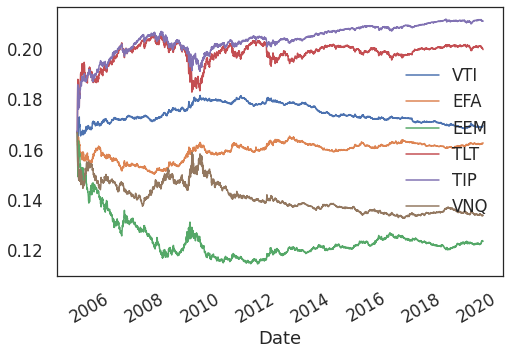

In [20]:
etf_olps.loc[r'AdaPAMR with $1/\sqrt{t}$ annealing', 'results'].weights.plot()

<AxesSubplot:xlabel='Date'>

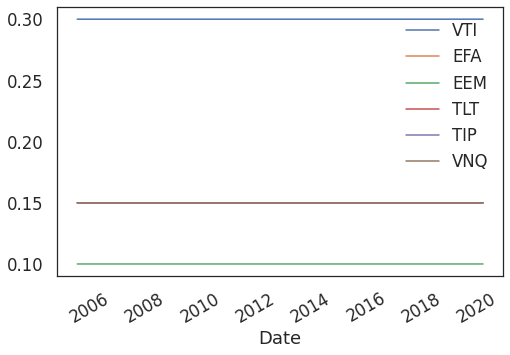

In [22]:
etf_olps.loc['CRP', 'results'].weights.plot()